## Download and Extract Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1iSm_jNCaemIjxBe2DLLyXcH_KAYQniCA
!unzip -q /content/dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1iSm_jNCaemIjxBe2DLLyXcH_KAYQniCA
To: /content/dataset.zip
100% 35.0M/35.0M [00:00<00:00, 96.2MB/s]


## Change Dataset Folder Structure to Coco 2017

In [ ]:
!mv /content/dataset/train /content/dataset/train2017
!mv /content/dataset/valid /content/dataset/val2017
!mv /content/dataset/annotations/train_annotations.json /content/dataset/annotations/instances_train2017.json
!mv /content/dataset/annotations/valid_annotations.json /content/dataset/annotations/instances_val2017.json

## Clone DETR Repo

We using DETR fork for this colab (because this fork can change the number of classes)

In [ ]:
!git clone https://github.com/aivclab/detr
!pip install -r /content/detr/requirements.txt
!pip install torch==1.8.0 torchvision==0.9.0

Cloning into 'detr'...
remote: Enumerating objects: 264, done.
remote: Total 264 (delta 0), reused 0 (delta 0), pack-reused 264
Receiving objects: 100% (264/264), 14.14 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (144/144), done.
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-upcvys09/pycocotools_ee73aae9441743a484ecfbb2064d5588
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-install-upcvys09/pycocotools_ee73aae9441743a484ecfbb2064d5588
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-upcvys09/panopticapi_97da819781a942fbac067ebb046c845e
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-install-upcvys09/panopticapi_97da819781a942fbac067ebb046c845e
     |████████████████████████████████| 70 kB 3.3 MB/s 
     |████████████████████████████████| 12.7 MB 9.2 MB/s 
     |████████████████████████████████| 4.9 MB 38.1 MB/s 
  Created wheel for pycocotools: filename=

## Finetuning Preparation

In [ ]:
import torch

checkpoint = torch.hub.load_state_dict_from_url(
            url='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth',
            map_location='cpu',
            check_hash=True)

del checkpoint['model']['class_embed.weight']
del checkpoint['model']['class_embed.bias']

torch.save(checkpoint, '/content/detr-r50_no-class-head.pth')

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


  0%|          | 0.00/159M [00:00<?, ?B/s]

## Model

In [ ]:
n_class = 4 # 3 class (plastic, bio, and rov) + 1 for no class
data_file = 'coco'
data_dir = '/content/dataset'
resume_file = '/content/detr-r50_no-class-head.pth'
!mkdir /content/outputs
out_dir = '/content/outputs'

In [ ]:
%cd /content/detr

!python main.py \
  --dataset_file $data_file \
  --coco_path $data_dir \
  --output_dir $out_dir \
  --resume $resume_file \
  --num_classes $n_class \
  --lr 1e-5 \
  --lr_backbone 1e-6 \
  --epochs 20

/content/detr
Not using distributed mode
git:
  sha: 8830cacdc981924169546a0e59d94b6c94fd775d, status: clean, branch: master

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/dataset', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=20, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=1e-05, lr_backbone=1e-06, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=4, num_queries=100, num_workers=2, output_dir='/content/outputs', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/content/detr-r50_no-class-head.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
Building a DETR model with 4 classes
Downloading: "https://download.pytorc

## Performance Graph

In [ ]:
from util.plot_utils import plot_logs
from pathlib import Path

log_directory = [Path(out_dir)]

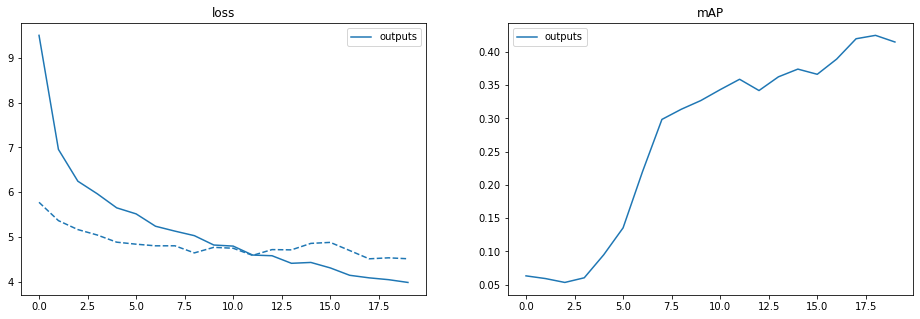

In [ ]:
fields_of_interest = ('loss', 'mAP')
plot_logs(log_directory, fields_of_interest)

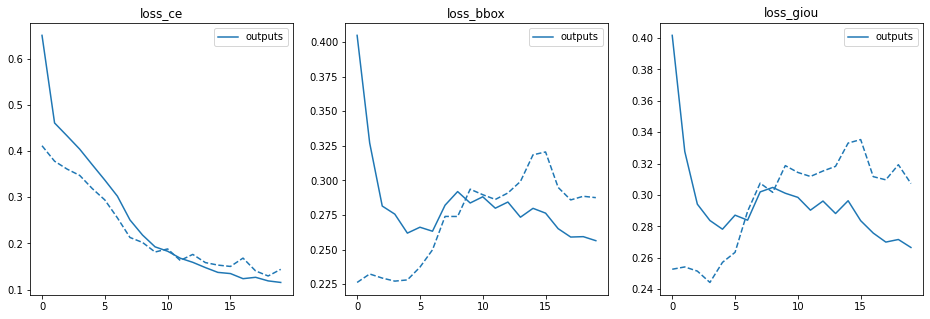

In [ ]:
fields_of_interest = ('loss_ce', 'loss_bbox', 'loss_giou')
plot_logs(log_directory, fields_of_interest)

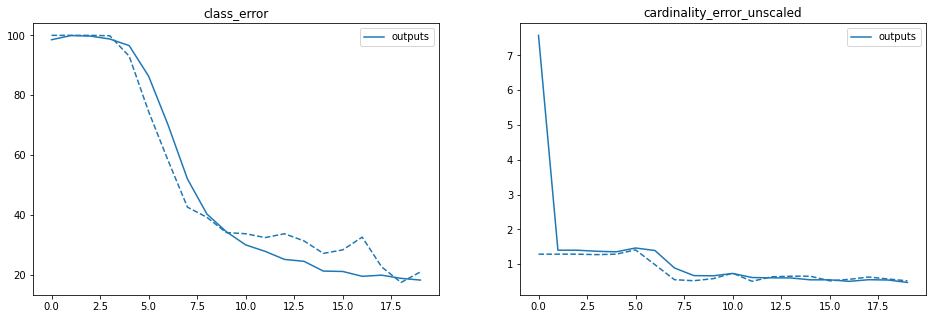

In [ ]:
fields_of_interest = ('class_error', 'cardinality_error_unscaled')
plot_logs(log_directory, fields_of_interest)   